In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import pickle
import glob

In [3]:
mypath = "/home/mmarzec12/data/"
savepath = "D:/0Studia/Data-Science-PW/Masters-thesis/models/vae/model_tuning/"
plot_savepath = "D:/0Studia/Data-Science-PW/Masters-thesis/images/empirical_plots/models_related/"

## Choosing $\beta$

In [4]:
n_files = len(glob.glob(savepath+"beta/"+"/*"))
res = []
for i in range(1,n_files+1):
    res.append(pd.read_pickle(savepath+"beta/"+f"/vae_{i}"))

In [10]:
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [21]:
linestyle_tuple = [(0, ())] * len(res)

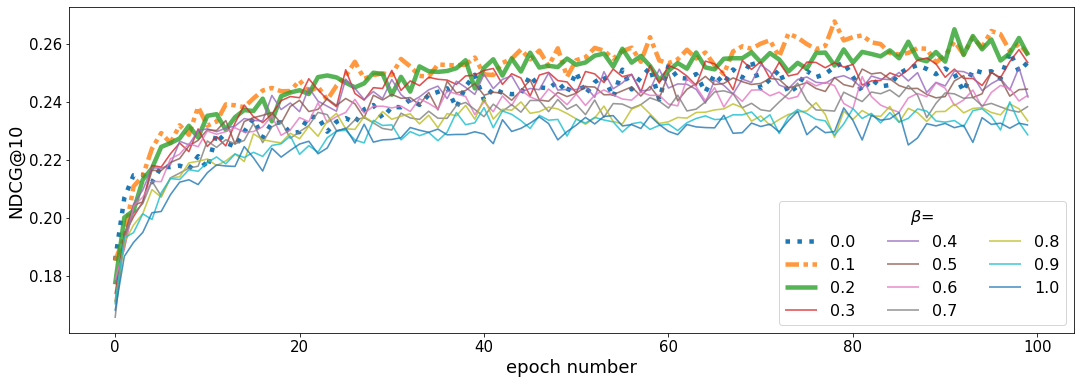

In [39]:
plt.figure(figsize=(18,6))
leg = []
for run, linestyle in zip(res, linestyle_tuple):
    lw = 1.6
    alpha = 0.8
    if round(run["beta"],2)==0.2:
        lw = 4.5
        #linestyle = (0, (3, 1, 1, 1, 1, 1)) #"--"
    elif round(run["beta"],2)==0.1:
        lw = 4.5
        linestyle =  (0, (3, 1, 1, 1, 1, 1))
    elif round(run["beta"],2)==0:
        lw = 4.5
        linestyle = ":" #"-."
        alpha = 1
        
    plt.plot(run["NDCG10"], linestyle=linestyle, lw=lw, alpha=alpha)
    leg.append(round(run["beta"],2))
    
plt.legend(leg, title=r"$\beta$=", ncol=3, loc="lower right", fontsize=16, title_fontsize=16)
#plt.title("NDCG@10 for different values of Beta",  fontsize=18)
plt.xlabel("epoch number",  fontsize=18)
plt.ylabel("NDCG@10", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig(plot_savepath+"VAE_tuning_beta.png")
plt.show()

## Choosing number of neurons

In [11]:
n_files = len(glob.glob(savepath+"neurons/"+"/*"))
res = []
for i in range(1,n_files+1):
    res.append(pd.read_pickle(savepath+"neurons/"+f"/vae_{i}"))

In [12]:
resdf = pd.DataFrame(columns=["latent_dim", "layers_dim", "metric_name", "metric_value"])
rows_list = []
for r in res:
    d1 = {}
    d1["latent_dim"] = r["latent_dim"]
    d1["layers_dim"] = str(r["encoder_dims"][1:-1])
    d1["metric_name"] = "NDCG10"
    d1["metric_value"] = np.mean(r["NDCG10"][:-10])
    rows_list.append(d1)
    
    d2 = {}
    d2["latent_dim"] = r["latent_dim"]
    d2["layers_dim"] = str(r["encoder_dims"][1:-1])
    d2["metric_name"] = "ERR10"
    d2["metric_value"] = np.mean(r["ERR10"][:-10])
    rows_list.append(d2)
    
    d3 = {}
    d3["latent_dim"] = r["latent_dim"]
    d3["layers_dim"] = str(r["encoder_dims"][1:-1])
    d3["metric_name"] = "HR10"
    d3["metric_value"] = np.mean(r["HR10"][:-10])
    rows_list.append(d3)

    
resdf = pd.DataFrame(rows_list)

In [13]:
# best value
tmp = resdf.loc[(resdf.metric_name=="NDCG10")]
resdf.iloc[tmp.metric_value.idxmax(),:]

latent_dim           300
layers_dim        [1000]
metric_name       NDCG10
metric_value    0.256236
Name: 33, dtype: object

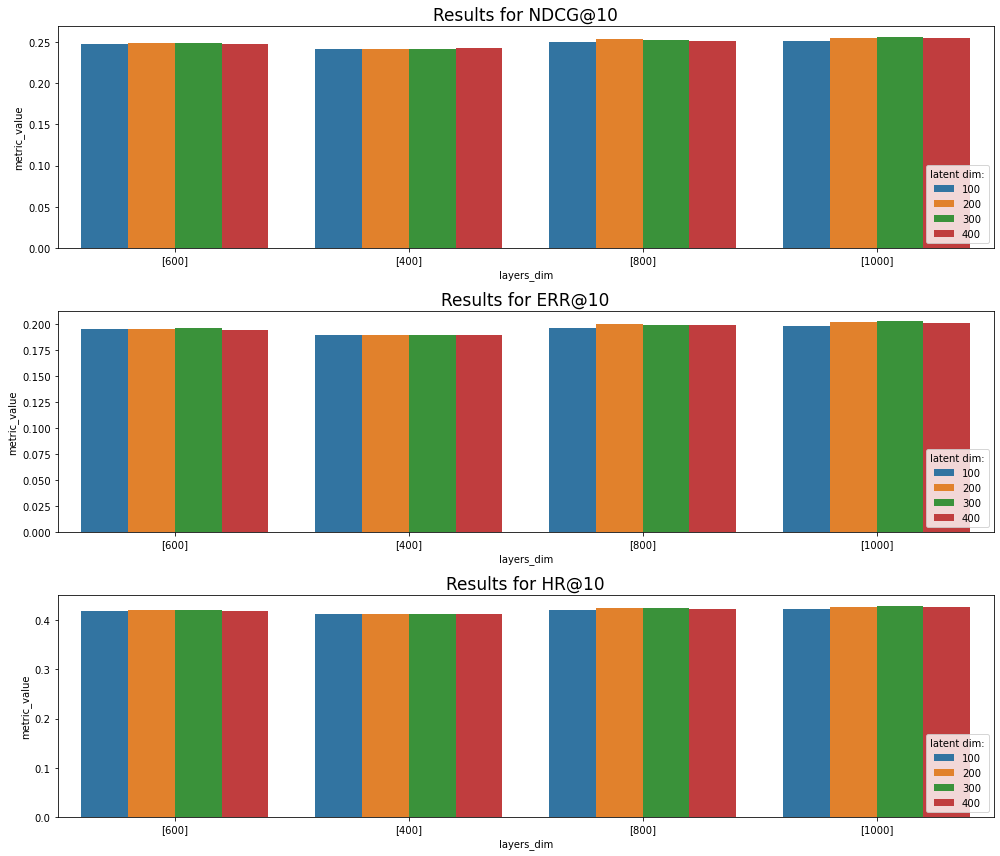

In [17]:
metrics = resdf.metric_name.unique()
fig, axes = plt.subplots(3, 1, figsize=(14,12))
axes = axes.ravel()
sn.set_color_codes("muted")
for i in range(len(metrics)):
    tmp = resdf[resdf.metric_name==metrics[i]]
    axes[i].set_title(f"Results for {metrics[i][:-2]}@{metrics[i][-2:]}", fontsize=17)
    sn.barplot(y="metric_value", x="layers_dim", hue="latent_dim", data=tmp, ax=axes[i])
    axes[i].legend(title="latent dim:", loc="lower right")
    plt.savefig(plot_savepath+"VAE_tuning_neurons_"+metrics[i]+".png")
    
fig.tight_layout()
# fig.delaxes(axes[-1])

## Choosing dropout

In [40]:
n_files = len(glob.glob(savepath+"dropout/"+"/*"))
res = []
for i in range(1,n_files+1):
    res.append(pd.read_pickle(savepath+"dropout/"+f"/vae_{i}"))

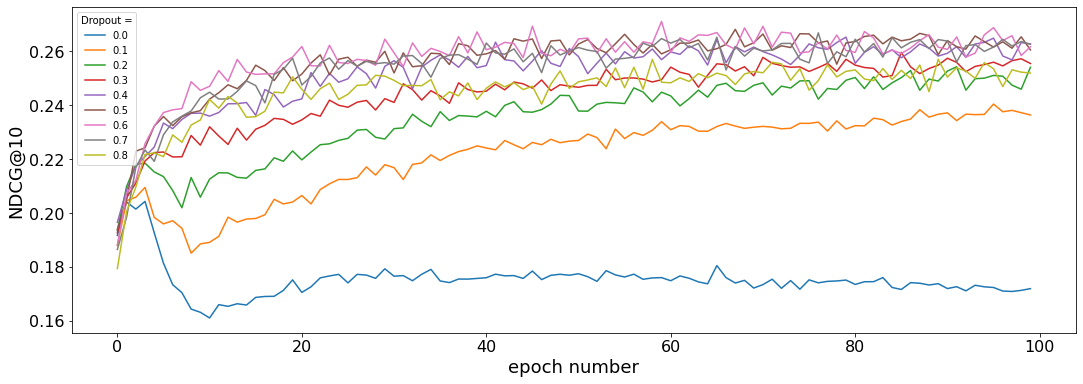

In [41]:
plt.figure(figsize=(18,6))
leg = []
for run in res:
    plt.plot(run["NDCG10"])
    leg.append(round(run["dropout"],2))
    
plt.legend(leg, title = "Dropout =")
#plt.title("NDCG@10 for different values of dropout",  fontsize=18)
plt.xlabel("epoch number",  fontsize=18)
plt.ylabel("NDCG@10", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(plot_savepath+"VAE_tuning_dropout.png")
plt.show()

In [11]:
res[0].keys()

dict_keys(['dropout', 'NDCG10', 'ERR10', 'HR10', 'train_params', 'base_params'])

In [13]:
res[0]["base_params"]

{'latent_dim': 300,
 'encoder_dims': [2265, 1000, 300],
 'decoder_dims': [300, 1000, 2265],
 'dropout': 0.0}

## Final results

In [14]:
pd.read_pickle(savepath+"vae_best_params")

{'train_params': {'n_epochs': 100,
  'k': 10,
  'optimizer_kwargs': {'weight_decay': 0, 'lr': 0.0005},
  'beta': 0.1},
 'base_params': {'latent_dim': 300,
  'encoder_dims': [2265, 1000, 300],
  'decoder_dims': [300, 1000, 2265],
  'dropout': 0.6000000000000001}}